# Extracting Data #

### Kaggle API ###

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
# Kaggle API username and key: {"username":"meganrottkamp","key":"ed76fd6e08cc1d607845adb45d15a37f"}
# Kaggle Dataset: https://www.kaggle.com/datasets/aryashah2k/breast-ultrasound-images-dataset/code?datasetId=1209633

# Downloading data using Kaggle API
od.download("https://www.kaggle.com/datasets/aryashah2k/breast-ultrasound-images-dataset/code?datasetId=1209633")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: meganrottkamp
Your Kaggle Key: ··········


100%|██████████| 195M/195M [00:01<00:00, 158MB/s]


The dataset contains 780 breast ultrasound images(PNG format). The data  was collected among 600 female patients in ages between 25 and 75 years old in 2018.

The dataset has 3 labels:
*   0 - Benign
*   1 - Malignant
*   2 - Normal

Each image also has an associated masked ground truth image.

In [4]:
import glob
import os

In [5]:
# updated
# separate the images into masked and unmasked
masked_images = glob.glob("/content/breast-ultrasound-images-dataset/*/*/*_mask*")
non_masked_images = [file for file in glob.glob(os.path.join("/content/breast-ultrasound-images-dataset/*/*", '*')) if 'mask' not in file]

In [6]:
masked_images[0:5]

['/content/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/malignant/malignant (118)_mask.png',
 '/content/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/malignant/malignant (159)_mask.png',
 '/content/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/malignant/malignant (162)_mask.png',
 '/content/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/malignant/malignant (200)_mask.png',
 '/content/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/malignant/malignant (28)_mask.png']

In [7]:
non_masked_images[0:5]

['/content/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/malignant/malignant (108).png',
 '/content/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/malignant/malignant (178).png',
 '/content/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/malignant/malignant (40).png',
 '/content/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/malignant/malignant (47).png',
 '/content/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/malignant/malignant (149).png']

### Importing Images ###

In [8]:
# Importing Libraries

import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow import keras
import os
from keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import Dropout
from keras.layers import Concatenate
from keras.layers import MaxPooling2D
from keras.layers import Conv2DTranspose
from keras import Model

path = '/content/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/'

In [9]:
# Indexing Function

def num (image) :
    val = 0
    for i in range(len(image)) :
        if image[i] == '(' :
            while True :
                i += 1
                if image[i] == ')' :
                    break
                val = (val*10) + int(image[i])
            break
    return val

In [10]:
# Initializing the Arrays

# Benign, 437 samples
X_b, y_b = np.zeros((437, 128, 128, 1)), np.zeros((437, 128, 128, 1))
# Normal, 133 samples
X_n, y_n = np.zeros((133, 128, 128, 1)), np.zeros((133, 128, 128, 1))
# Malignant, 210 samples
X_m, y_m = np.zeros((210, 128, 128, 1)), np.zeros((210, 128, 128, 1))

In [11]:
for i, tumor_type in enumerate(os.listdir(path)) :
    for image in os.listdir(path+tumor_type+'/') :
        p = os.path.join(path+tumor_type, image)
        img = cv2.imread(p,cv2.IMREAD_GRAYSCALE)
        if image[-5] == ')' :
            img = cv2.resize(img,(128,128))
            pil_img = Image.fromarray (img)
            if image[0] == 'b' :
                X_b[num(image)-1]+= img_to_array(pil_img)
            if image[0] == 'n' :
                X_n[num(image)-1]+= img_to_array(pil_img)
            if image[0] == 'm' :
                X_m[num(image)-1]+= img_to_array(pil_img)
        else :
            img = cv2.resize(img,(128,128))
            pil_img = Image.fromarray (img)
            if image[0] == 'b' :
                y_b[num(image)-1]+= img_to_array(pil_img)
            if image[0] == 'n' :
                y_n[num(image)-1]+= img_to_array(pil_img)
            if image[0] == 'm' :
                y_m[num(image)-1]+= img_to_array(pil_img)

### Visualizing Images ###

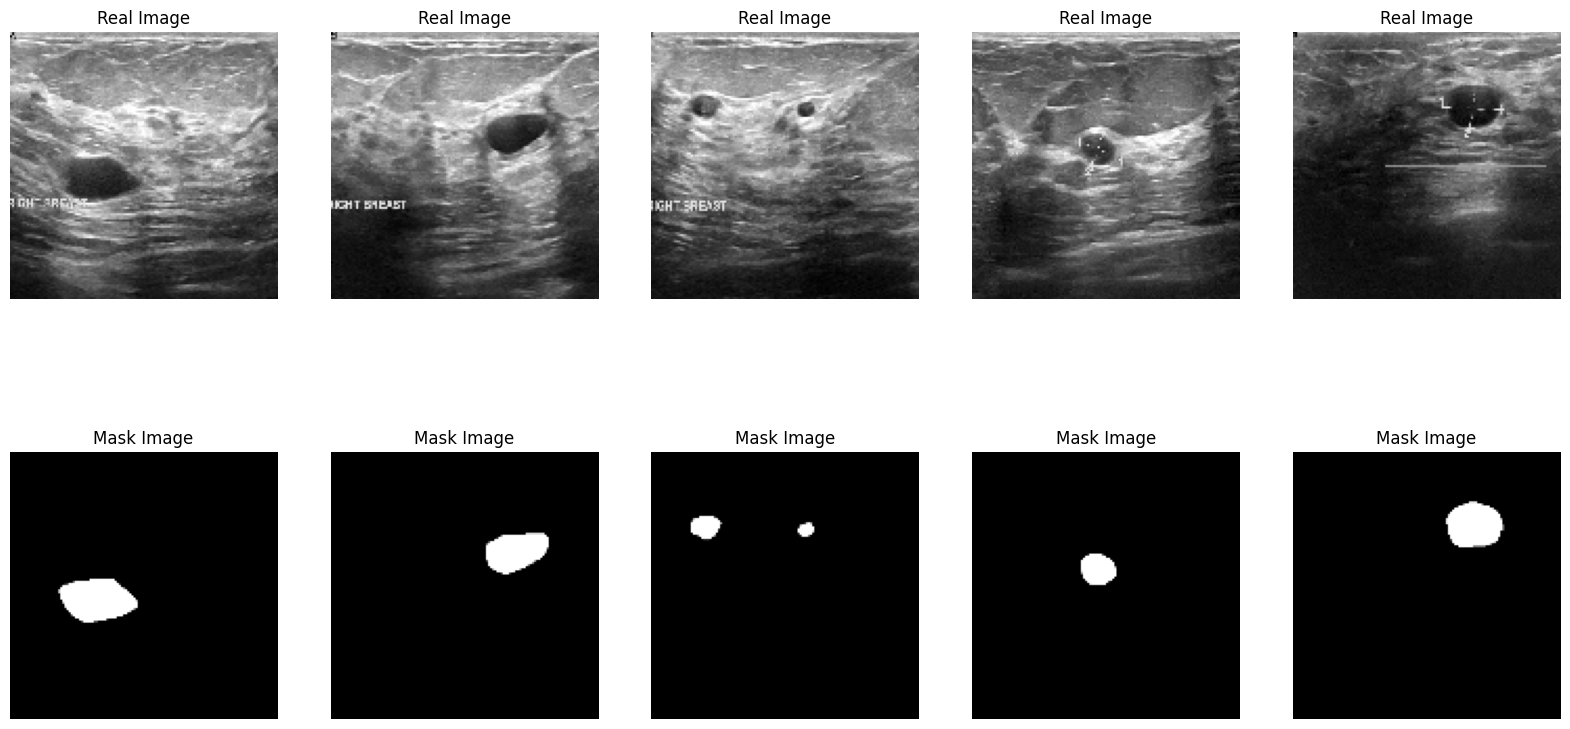

In [12]:
plt.figure(figsize = (20,10))

for i in range(5) :
    plt.subplot(2,5,i+1)
    plt.imshow(X_b[i+1], 'gray')
    plt.title('Real Image')
    plt.axis('off')

for i in range(5) :
    plt.subplot(2,5,i+6)
    plt.imshow(y_b[i+1], 'gray')
    plt.title('Mask Image')
    plt.axis('off')
plt.show()

### Creating Datasets for Training and Validation ###

In [13]:
X = np.concatenate((X_b, X_n, X_m), axis = 0)
y = np.concatenate((y_b, y_n, y_m), axis = 0)
y[y > 1.0] = 1.0

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(741, 128, 128, 1)
(741, 128, 128, 1)
(39, 128, 128, 1)
(39, 128, 128, 1)


# Model 1: SAM #

# Model 2: U-Net #

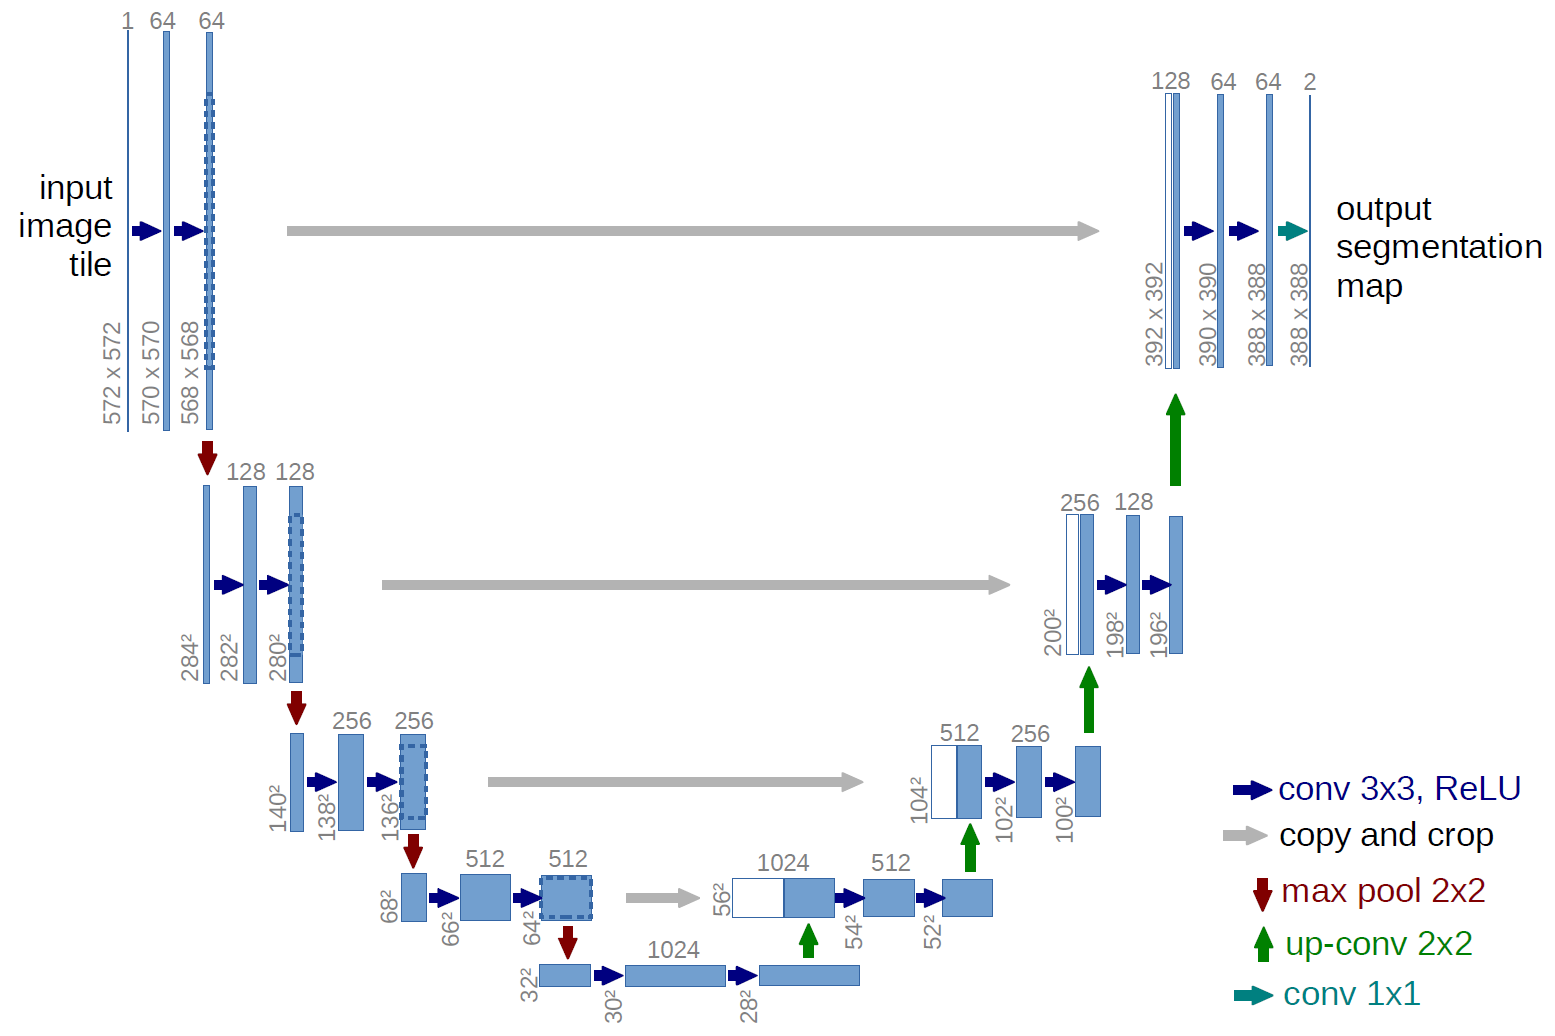

In [15]:
# Contract Path

inply = Input((128, 128, 1,))

conv1 = Conv2D(2**6, (3,3), activation = 'relu', padding = 'same')(inply)
conv1 = Conv2D(2**6, (3,3), activation = 'relu', padding = 'same')(conv1)
pool1 = MaxPooling2D((2,2), strides = 2, padding = 'same')(conv1)
drop1 = Dropout(0.2)(pool1)

conv2 = Conv2D(2**7, (3,3), activation = 'relu', padding = 'same')(drop1)
conv2 = Conv2D(2**7, (3,3), activation = 'relu', padding = 'same')(conv2)
pool2 = MaxPooling2D((2,2), strides = 2, padding = 'same')(conv2)
drop2 = Dropout(0.2)(pool2)

conv3 = Conv2D(2**8, (3,3), activation = 'relu', padding = 'same')(drop2)
conv3 = Conv2D(2**8, (3,3), activation = 'relu', padding = 'same')(conv3)
pool3 = MaxPooling2D((2,2), strides = 2, padding = 'same')(conv3)
drop3 = Dropout(0.2)(pool3)

conv4 = Conv2D(2**9, (3,3), activation = 'relu', padding = 'same')(drop3)
conv4 = Conv2D(2**9, (3,3), activation = 'relu', padding = 'same')(conv4)
pool4 = MaxPooling2D((2,2), strides = 2, padding = 'same')(conv4)
drop4 = Dropout(0.2)(pool4)

In [16]:
# Bottleneck Layer

convm = Conv2D(2**10, (3,3), activation = 'relu', padding = 'same')(drop4)
convm = Conv2D(2**10, (3,3), activation = 'relu', padding = 'same')(convm)

In [17]:
# Expanding Layer

tran5 = Conv2DTranspose(2**9, (2,2), strides = 2, padding = 'valid', activation = 'relu')(convm)
conc5 = Concatenate()([tran5, conv4])
conv5 = Conv2D(2**9, (3,3), activation = 'relu', padding = 'same')(conc5)
conv5 = Conv2D(2**9, (3,3), activation = 'relu', padding = 'same')(conv5)
drop5 = Dropout(0.1)(conv5)

tran6 = Conv2DTranspose(2**8, (2,2), strides = 2, padding = 'valid', activation = 'relu')(drop5)
conc6 = Concatenate()([tran6, conv3])
conv6 = Conv2D(2**8, (3,3), activation = 'relu', padding = 'same')(conc6)
conv6 = Conv2D(2**8, (3,3), activation = 'relu', padding = 'same')(conv6)
drop6 = Dropout(0.1)(conv6)

tran7 = Conv2DTranspose(2**7, (2,2), strides = 2, padding = 'valid', activation = 'relu')(drop6)
conc7 = Concatenate()([tran7, conv2])
conv7 = Conv2D(2**7, (3,3), activation = 'relu', padding = 'same')(conc7)
conv7 = Conv2D(2**7, (3,3), activation = 'relu', padding = 'same')(conv7)
drop7 = Dropout(0.1)(conv7)

tran8 = Conv2DTranspose(2**6, (2,2), strides = 2, padding = 'valid', activation = 'relu')(drop7)
conc8 = Concatenate()([tran8, conv1])
conv8 = Conv2D(2**6, (3,3), activation = 'relu', padding = 'same')(conc8)
conv8 = Conv2D(2**6, (3,3), activation = 'relu', padding = 'same')(conv8)
drop8 = Dropout(0.1)(conv8)

In [18]:
outly = Conv2D(2**0, (1,1), activation = 'relu', padding = 'same')(drop8)
model = Model(inputs = inply, outputs = outly, name = 'U-net')

In [19]:
# Loss Function

from keras.metrics import MeanIoU

## Training

In [20]:
model.compile(loss = 'mean_squared_error', optimizer = keras.optimizers.Adam(learning_rate = 0.00005))
print(model.summary())

Model: "U-net"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 64)         640       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 64)         36928     ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 64, 64, 64)           0         ['conv2d_1[0][0]']            
 D)                                                                                           

In [21]:
from keras.callbacks import ModelCheckpoint

checkp = ModelCheckpoint('./cancer_image_model.h5', monitor = 'val_loss', save_best_only = True, verbose = 1)
history = model.fit(X_train, y_train, epochs = 200, batch_size = 32, validation_data = (X_test, y_test), callbacks = [checkp])

Epoch 1/200
24/24 [==============================] - ETA: 0s - loss: 0.0805
Epoch 1: val_loss improved from inf to 0.08258, saving model to ./cancer_image_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


24/24 [==============================] - 26s 349ms/step - loss: 0.0805 - val_loss: 0.0826
Epoch 2/200
23/24 [===========================>..] - ETA: 0s - loss: 0.0790
Epoch 2: val_loss improved from 0.08258 to 0.08238, saving model to ./cancer_image_model.h5
24/24 [==============================] - 4s 188ms/step - loss: 0.0787 - val_loss: 0.0824
Epoch 3/200
23/24 [===========================>..] - ETA: 0s - loss: 0.0770
Epoch 3: val_loss improved from 0.08238 to 0.08066, saving model to ./cancer_image_model.h5
24/24 [==============================] - 5s 198ms/step - loss: 0.0772 - val_loss: 0.0807
Epoch 4/200
23/24 [===========================>..] - ETA: 0s - loss: 0.0741
Epoch 4: val_loss improved from 0.08066 to 0.07651, saving model to ./cancer_image_model.h5
24/24 [==============================] - 5s 195ms/step - loss: 0.0739 - val_loss: 0.0765
Epoch 5/200
23/24 [===========================>..] - ETA: 0s - loss: 0.0783
Epoch 5: val_loss did not improve from 0.07651
24/24 [=========

### Model Performance ###

Text(0.5, 1.0, 'Losses vs Epochs')

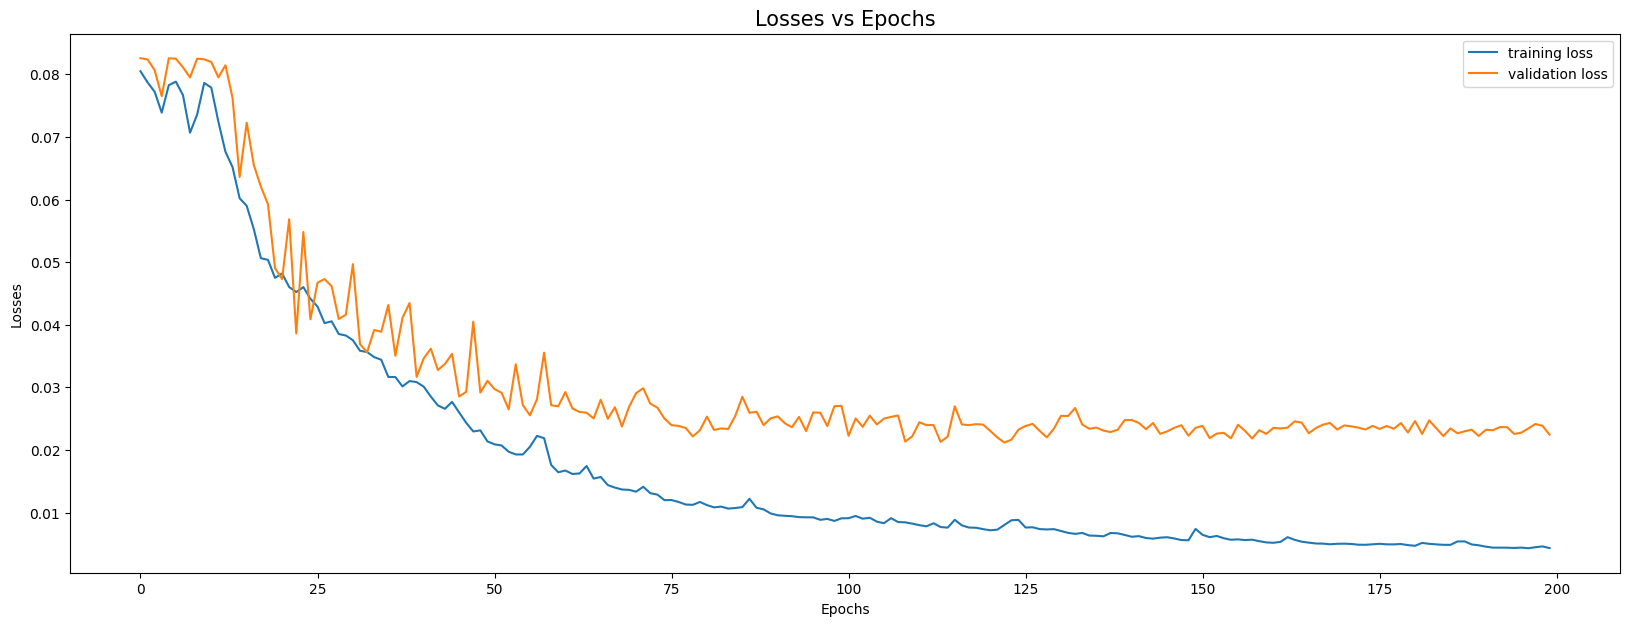

In [22]:
plt.figure(figsize = (20,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss', 'validation loss'])
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title('Losses vs Epochs', fontsize = 15)

In [23]:
from keras.models import load_model
model = load_model('./cancer_image_model.h5')
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 36ms/step


### Predictions ###

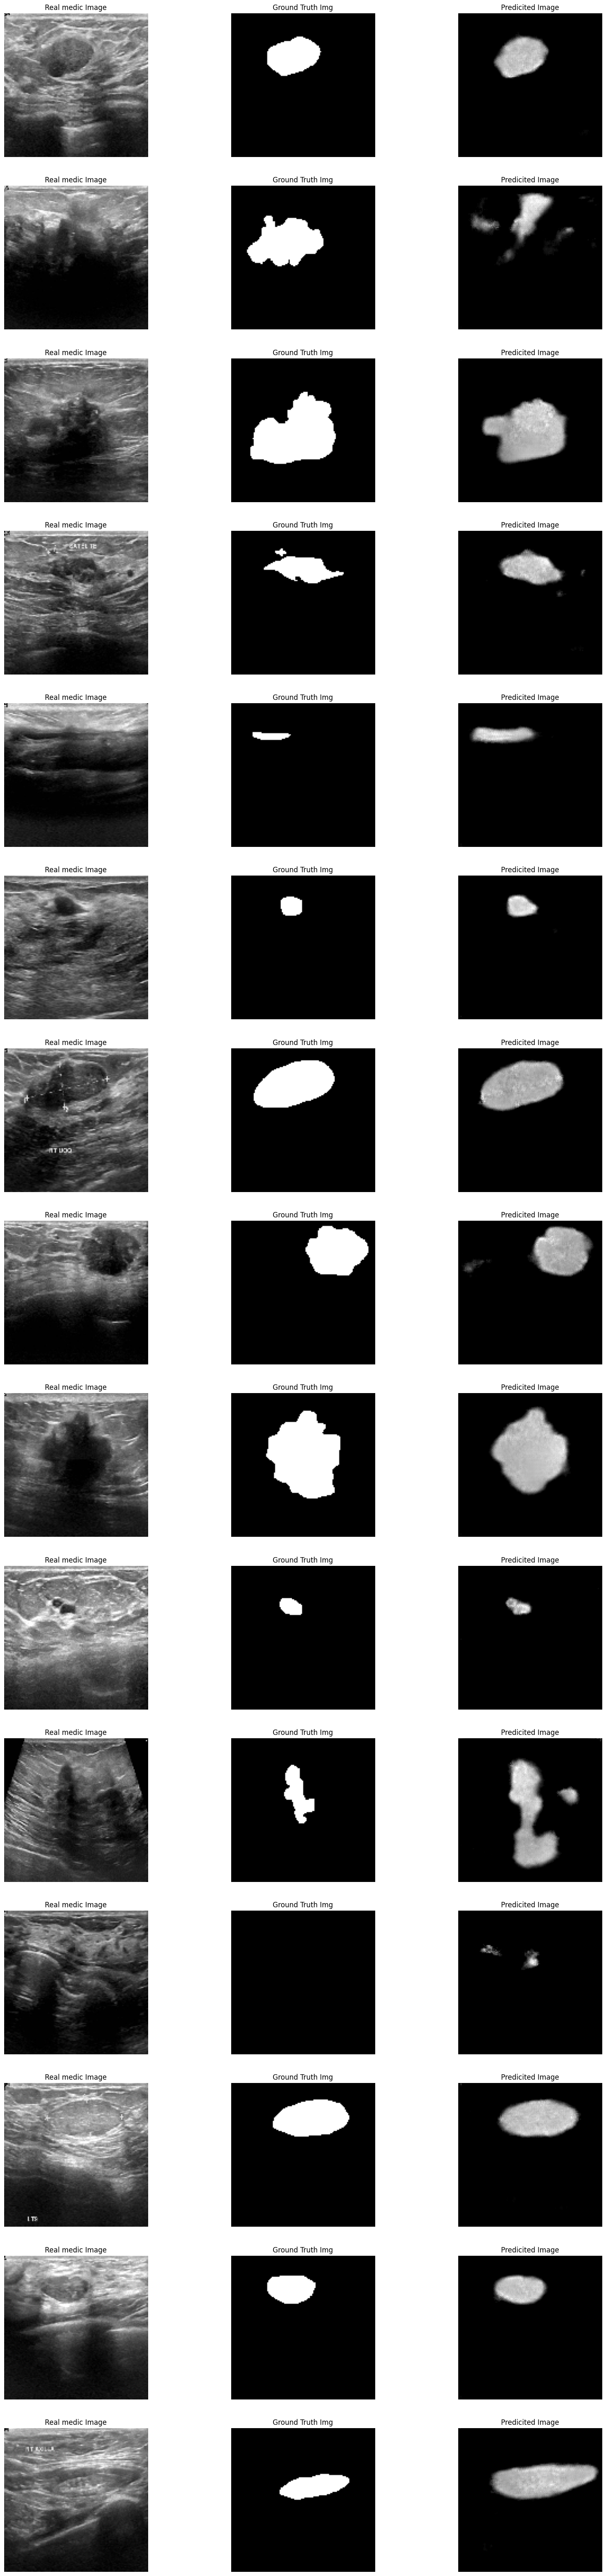

In [24]:
plt.figure(figsize = (20,80))

i = 0
x = 0
while i < 45 :
    plt.subplot(15,3,i+1)
    plt.imshow(X_test[x], 'gray')
    plt.title('Real medic Image')
    plt.axis('off')
    plt.subplot(15,3,i+2)
    plt.imshow(y_test[x], 'gray')
    plt.title('Ground Truth Img')
    plt.axis('off')
    plt.subplot(15,3,i+3)
    plt.imshow(y_pred[x], 'gray')
    plt.title('Predicited Image')
    plt.axis('off')
    x += 1
    i += 3
plt.show()